<a href="https://colab.research.google.com/github/GGrinspun/ML_pratica_1/blob/main/GABRIEL_SALLES_GRINSPUN_ML_Pratica_01_Tratamento_de_Dados_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 01 - Tratamento de Dados - Preparação de Dados para Machine Learning


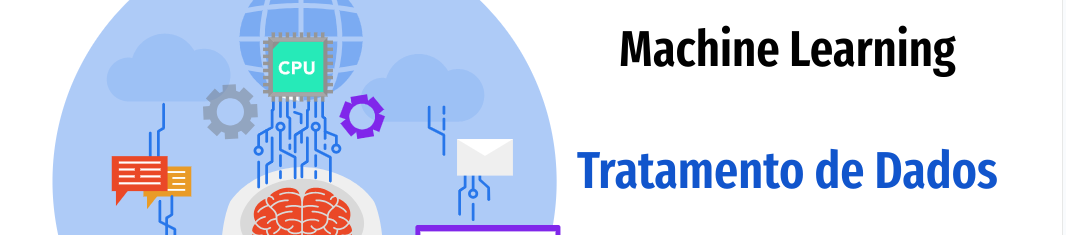

  

- Gabriel Grinspun! (gsg@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é consolidar os conceitos de tratamentos de dados vistos em sala de aula. Em breve, iremos montar modelo(s) de Machine Learning; desta forma, precisamos garantir que os dados de entrada deste(s) modelo(s) estejam aceitáveis e organizados da forma correta.
```

**Instruções para a prática.**

1. Usar o dataset informado na célula `definição das libraries/dataset`, **NÃO** usar outro dataset do Titanic carregado ou outro link da Internet.

2. Realizar as etapas nas correspondentes células, contendo instruções/dicas e a respectiva pontuação da prática.

3. Submeter no Classroom até a data limite. Após o prazo limite, punição de 20 pontos por dia de atraso.
  *   Todos os códigos irão ser submetidos numa ferramenta de plágio, questões/códigos com plágio detectado serão atribuídos nota zero na respectiva questão. *Foque a discussão com sua dupla!*

4. Use o chatGPT com moderação. Ele não acerta sempre não viu? 😅

5. Sinta-se a vontade para adicionar células de texto/código, porém não apague as que são da estrutura da prática (numeração/divisão das partes).


In [ ]:
# Celula de definicao das libraries/dataset
import pandas as pd
import matplotlib.pyplot as plt
# Importe outras libraries que vc ira usar aqui!

# NAO ALTERAR ESTA DEFINICAO DE DATASET/OBJETO
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

## Parte I - Análise Exploratória dos Dados  (AED)

**Pontuação: 20 pontos**

Realize a análise exploratória do conjunto de dados do Titanic, isto é, procure padrões, insights e observações sobre os dados. Após realizar a AED, indique dois insights (descobertas) sobre o conjunto de dados.

In [ ]:
titanic.shape #mostrar qt de linhas e colunas

(891, 12)

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

*podemos ver que alguns passageiros não foram registrados por qual porto entraram, vamos ver se os outros dados desses passageiros que teoricamente não embarcaram em nenhum porto estão ausentes*

In [ ]:
# Filtrar linhas onde 'Embarked' é NaN
linhas_faltantes_embarked = titanic[titanic['Embarked'].isna()]

# Exibir exemplos das linhas em que 'Embarked' está faltando
linhas_faltantes_embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
linhas_B28 = titanic.loc[titanic['Cabin'] == 'B28']
linhas_B28

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
mesmo_ticket = titanic.loc[titanic['Ticket'] == '113572']
mesmo_ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
classe_valores = titanic['Age'].dtype
print(classe_valores)

float64


*podemos perceber que a coluna Age está em tipo Float, esses valores deveriam estar no formato Int*

In [ ]:
# Preencher os valores não finitos na coluna 'Age' com 0
titanic['Age'].fillna(0, inplace=True)

titanic['Age'] = titanic['Age'].astype(int)
print(titanic['Age'].dtype)

#valores alterados para o formato Int

int64


In [ ]:
#criando um heatmap de correlação

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#correlation_matrix = titanic.corr()

# Criar o heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title('Correlação entre as colunas do Titanic Dataset')
#plt.show()

*Nõ observamos nenhuma correlação muito forte entre as colunas desse data set, vamos investigar sobre o valor do ticket (fare)*

In [ ]:
ocorrencias_fare = titanic['Fare'].value_counts()
ocorrencias_fare

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [ ]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

*vamos criar uma coluna de passageiros que pagaram mais caro nas passagens (quartil 75%) e então verificar se há alguma correlação entre o porto de embarque e o valor do ticket*

In [ ]:
titanic['Fare_over_30'] = titanic['Fare'].apply(lambda x: 1 if x > 30 else 0)

# Verificar o resultado
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_over_30
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


### Insight 01 - passageiros que passaram mais caro na passagem entraram por algum porto especifico?


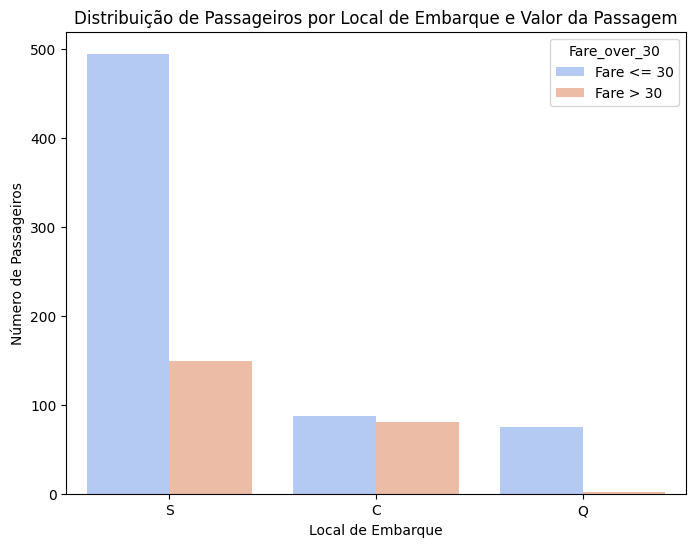

In [ ]:
#verificando os pares de ocorrencias C,S, P se são 0 ou 1
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Embarked', hue='Fare_over_30', palette='coolwarm')
plt.title('Distribuição de Passageiros por Local de Embarque e Valor da Passagem')
plt.xlabel('Local de Embarque')
plt.ylabel('Número de Passageiros')
plt.legend(title='Fare_over_30', loc='upper right', labels=['Fare <= 30', 'Fare > 30'])
plt.show()


*podemos analisar a partir desse grafico que: sim, a maior parte dos passageiros que pagaram as passagens mais caras entraram pelo porto de Southampton. Porem essa é uma das maiores cidades portuarias da inglaterra e o volume de passageiros foi muito alto, então se analisarmos levando em consideração o volume de pessoas, podemos perceber que, proporcionalmente no porto de Cherbourg entraram mais pessoas que pagaram por uma passagem mais cara para o volume de embarcantes neste ponto.*

### Insight 02 - O protocolo de segurança foi seguido de maneira correta? Houve alguma tendencia de mortalidade maior relacionada com a idade ou sexo dos passageiros?


*É comum que em muitos protocolos de segurança e/ou contenção de crises, se priorize a evacução de mulheres e crianças, a partir disso, vamos ver se homens, e principalmentes homens mais velhos tiveram uma taxa de mortalidade mais alta nesse acidente.*

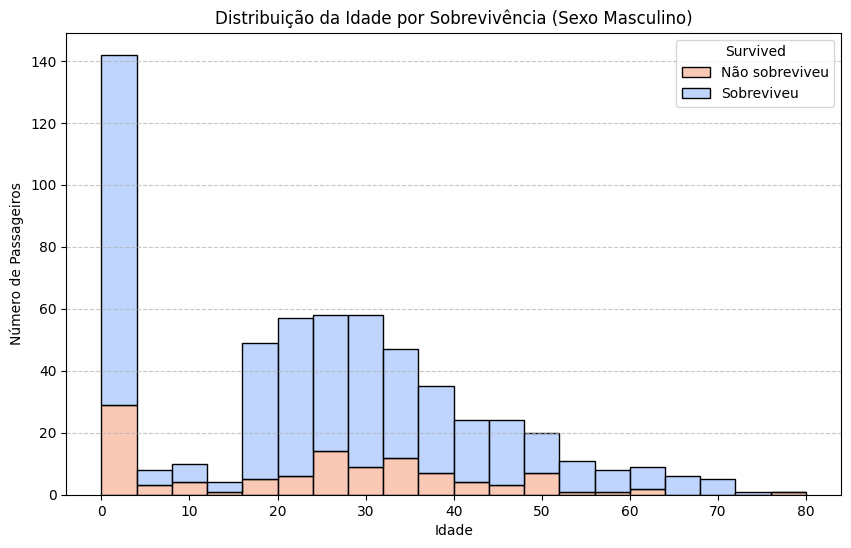

In [ ]:
male_passengers = titanic[(titanic['Sex'] == 'male')]
plt.figure(figsize=(10, 6))
sns.histplot(data=male_passengers, x='Age', hue='Survived', bins=20, multiple='stack', palette='coolwarm')
plt.title('Distribuição da Idade por Sobrevivência (Sexo Masculino)')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.legend(title='Survived', labels=['Não sobreviveu', 'Sobreviveu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

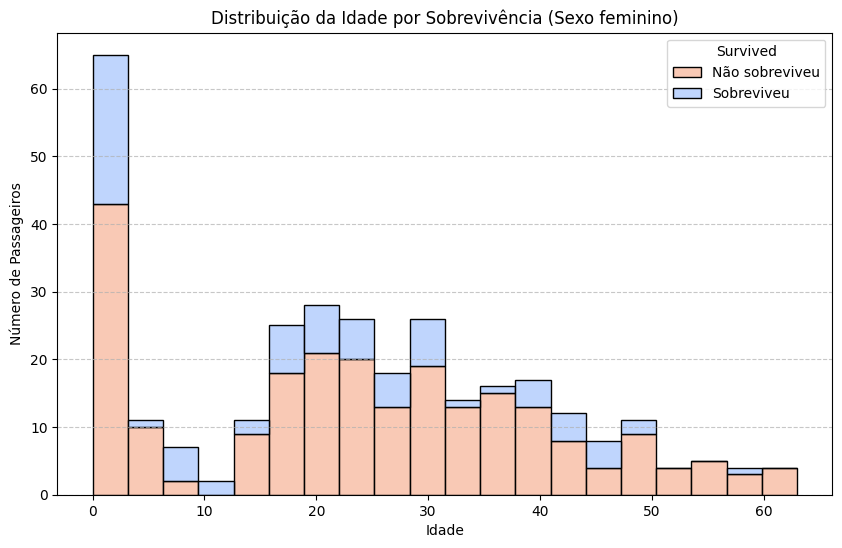

In [ ]:
female_passengers = titanic[(titanic['Sex'] == 'female')]
plt.figure(figsize=(10, 6))
sns.histplot(data=female_passengers, x='Age', hue='Survived', bins=20, multiple='stack', palette='coolwarm')
plt.title('Distribuição da Idade por Sobrevivência (Sexo feminino)')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.legend(title='Survived', labels=['Não sobreviveu', 'Sobreviveu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**través da visualização dos dados podemos perceber que há muito mais pessoas identificadas com idade 0 do que o normal, isso pode ser pois há dados de idades faltantes nesse conjunto de dados, lidaremos com isso mais tarde.*

*Voltando para o insight, podemos perceber que o numero de fatalidades entre as mulheres, foi maior do que entre os homens e alem disso, proporcionalmente essa taxa de mortalidade foi muito maior.*

## Parte II - Tratamento dos Dados

**Pontuação: 50 pontos**

Realize a limpeza dos dados seguindo os próximos tópicos.

### Realize a limpeza do Dataset

In [ ]:
# Note que temos algumas colunas que estao com muitos dados ausentes. Sera que podemos substituir eles de alguma forma?

In [ ]:
#dropar a coluna criada para análise do preço das passagens
titanic = titanic.drop(columns=['Fare_over_30'])

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

####passageiros de penetra?

*podemos ver que alguns passageiros não foram registrados por qual porto entraram, vamos ver se os outros dados desses passageiros que teoricamente não embarcaram em nenhum porto estão ausentes*

In [ ]:
# Filtrar linhas onde 'Embarked' é NaN
linhas_faltantes_embarked = titanic[titanic['Embarked'].isna()]

# Exibir exemplos das linhas em que 'Embarked' está faltando
linhas_faltantes_embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


*as duas passsageiras possuem o mesmo numero de ticket e a mesma cabine, vamos procurar por alguem que esteja na mesma cabine e supor que estas pessoas entraram pelo mesmo porto que seus companheiros de quarto*

In [ ]:
linhas_B28 = titanic.loc[titanic['Cabin'] == 'B28']
linhas_B28

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


In [ ]:
mesmo_ticket = titanic.loc[titanic['Ticket'] == '113572']
mesmo_ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


*nenhuma das passageiras está relacionada a um terceiro, seja por cabine ou ticket triplicado, portanto vamos elimina-las do dataset*

In [ ]:
titanic_limpo = titanic[titanic['Cabin'] != 'B28']

In [ ]:
titanic_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


####agrupando dados faltantes em clusters e substituindo a idade

In [ ]:
# --->> Tente propor alguma forma de nao perder tantos dados ausentes. <<<----------

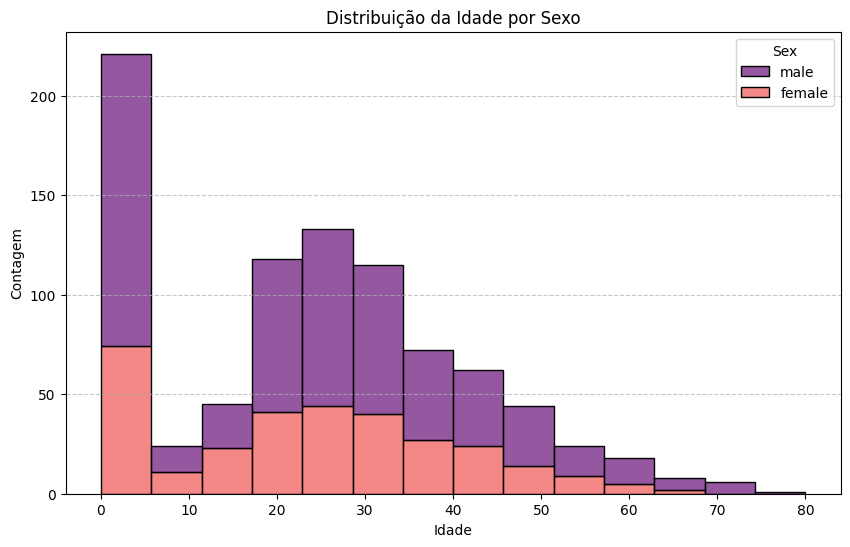

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Sex', palette='magma', multiple='stack')
plt.title('Distribuição da Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
titanic_limpo['Age'].value_counts().sort_index()

Age
0     184
1       7
2      10
3       6
4      10
     ... 
66      1
70      3
71      2
74      1
80      1
Name: count, Length: 71, dtype: int64

*como verificamos anteriormente, a coluna de idade possui muitos valores faltantes (estão com 0), vamos substituir essa lógica a partir da seguinte análise:*


---




*   Caso o tripulante esteja acompanhado dos pais (parch = number of parents / children aboard the Titanic), iremos trata-los como criança e ele receberá a média das idades das crianças
*   caso o tripulante possua esposa ou irmão(sibsp = 	number of siblings / spouses aboard the Titanic), ele receberá a média das idades das pessoas desse grupo


---


*O objetivo disso é tentar diminuir a quantidade de pessoas sem idade que serão dropadas e tentar assignar essas pessoas a grupos sem precisar usar apenas a média.*





In [ ]:
titanic_limpo['Parch'].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
ocorrencias_parch_e_age_igual0 = titanic_limpo[(titanic_limpo['Age'] == 0) & (titanic_limpo['Parch'] > 0)]
quantidade_ocorrencias = len(ocorrencias_parch_e_age_igual0)
print("Quantidade de ocorrências onde 'Age' é igual a 0 e 'Parch' é maior que 0:", quantidade_ocorrencias)


Quantidade de ocorrências onde 'Age' é igual a 0 e 'Parch' é maior que 0: 27


In [ ]:
ocorrencias_parch_e_age_igual0.head(21)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,0,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,248738,29.0000,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,0,1,1,2668,22.3583,F E69,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,0,0,2,2678,15.2458,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,0,8,2,CA. 2343,69.5500,NaN,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,0,0,1,113505,55.0000,E33,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,0,3,1,4133,25.4667,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,0,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,0,8,2,CA. 2343,69.5500,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,0,3,1,4133,25.4667,NaN,S


*podemos ver que temos apenas ocorrencias em que parch é 1 ou 2, vamos verificar a media das idades desses grupos excluindo os zerados e utilizar isso para substituir as faltantes*

In [ ]:
media_idades_parch1 = titanic_limpo[(titanic_limpo['Age'] > 0) & (titanic_limpo['Parch'] == 1)]['Age'].mean()
print(media_idades_parch1)

25.552380952380954


In [ ]:
media_idades_parch2 = titanic_limpo[(titanic_limpo['Age'] > 0) & (titanic_limpo['Parch'] == 2)]['Age'].mean()
print(media_idades_parch2)

17.696969696969695


In [ ]:
#setando as idades:
titanic_limpo.loc[(titanic_limpo['Age'] == 0) & (titanic_limpo['Parch'] == 1), 'Age'] = 25
titanic_limpo.loc[(titanic_limpo['Age'] == 0) & (titanic_limpo['Parch'] == 2), 'Age'] = 17

In [ ]:
#mesmo processo para pessoas com irmãos ou esposas
titanic_limpo['SibSp'].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [ ]:
ocorrencias_sibsp_e_age_igual0 = titanic_limpo[(titanic_limpo['Age'] == 0) & (titanic_limpo['SibSp'] > 0)]
quantidade_ocorrencias2 = len(ocorrencias_sibsp_e_age_igual0)
print("Quantidade de ocorrências onde 'Age' é igual a 0 e 'SibSp' é maior que 0:", quantidade_ocorrencias2)

Quantidade de ocorrências onde 'Age' é igual a 0 e 'SibSp' é maior que 0: 24


In [ ]:
ocorrencias_sibsp_e_age_igual0.head(17)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,0,1,0,PC 17569,146.5208,B78,C
46,47,0,3,"Lennon, Mr. Denis",male,0,1,0,370371,15.5000,NaN,Q
48,49,0,3,"Samaan, Mr. Youssef",male,0,2,0,2662,21.6792,NaN,C
109,110,1,3,"Moran, Miss. Bertha",female,0,1,0,371110,24.1500,NaN,Q
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,0,1,0,370365,15.5000,NaN,Q
214,215,0,3,"Kiernan, Mr. Philip",male,0,1,0,367229,7.7500,NaN,Q
240,241,0,3,"Zabour, Miss. Thamine",female,0,1,0,2665,14.4542,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,0,1,0,367230,15.5000,NaN,Q
301,302,1,3,"McCoy, Mr. Bernard",male,0,2,0,367226,23.2500,NaN,Q
330,331,1,3,"McCoy, Miss. Agnes",female,0,2,0,367226,23.2500,NaN,Q


*podemos ver que temos apenas ocorrencias em que SibSp é 1 ou 2, vamos verificar a media das idades desses grupos excluindo os fatantes e utilizar isso para substituir as faltantes*

In [ ]:
media_idades_Sibsp1 = titanic_limpo[(titanic_limpo['Age'] > 0) & (titanic_limpo['SibSp'] == 1)]['Age'].mean()
print(media_idades_Sibsp1)

30.20744680851064


In [ ]:
media_idades_Sibsp2 = titanic_limpo[(titanic_limpo['Age'] > 0) & (titanic_limpo['SibSp'] == 2)]['Age'].mean()
print(media_idades_Sibsp2)

24.56


In [ ]:
#setando as idades:
titanic_limpo.loc[(titanic_limpo['Age'] == 0) & (titanic_limpo['SibSp'] == 1), 'Age'] = 30
titanic_limpo.loc[(titanic_limpo['Age'] == 0) & (titanic_limpo['Parch'] == 2), 'Age'] = 24

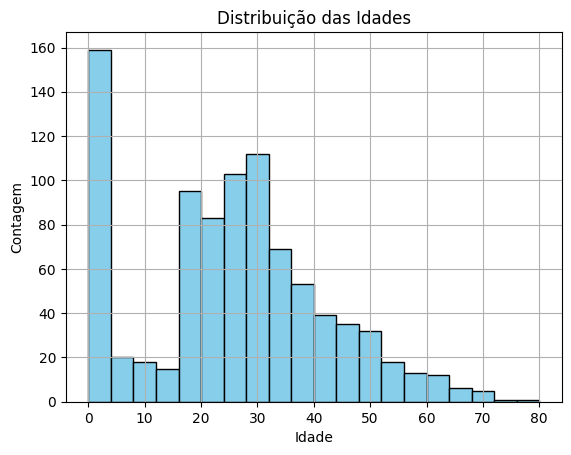

In [ ]:
plt.hist(titanic_limpo['Age'], bins=20, color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.grid(True)
plt.show()

In [ ]:
quantidade_age_zero = (titanic_limpo['Age'] == 0).sum()

# Exibir a quantidade de linhas onde 'Age' é igual a 0
print("Quantidade de linhas onde 'Age' é igual a 0:", quantidade_age_zero)

Quantidade de linhas onde 'Age' é igual a 0: 136


In [ ]:
#titanic_limpo = titanic_limpo[titanic_limpo['Age'] != 0]

*ainda há uma quantidade significante de valores com idade zero. Após análises, decidi deixar esses valores setados para a media geral para analisar a precisão do modelo, caso esteja prejudicando meu desempenho apagarei esses valores*


In [ ]:
import numpy as np
media_idades_sem_zero = np.mean(titanic_limpo[titanic_limpo['Age'] != 0]['Age'])
titanic_limpo.loc[titanic_limpo['Age'] == 0, 'Age'] = media_idades_sem_zero

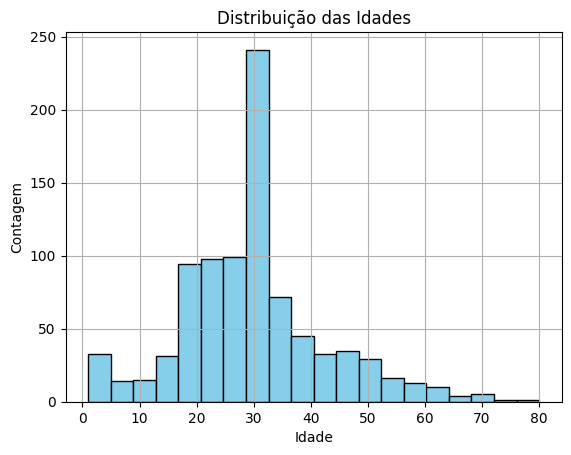

In [ ]:
plt.hist(titanic_limpo['Age'], bins=20, color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.grid(True)
plt.show()

### Exiba algumas informações úteis sobre o tipo de dados e valores nulos

In [ ]:
titanic_limpo.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Cabin          202
Embarked       889
dtype: int64

### Remova colunas que voce considera que não serão úteis para uma analise.

Considere que queremos descobrir se uma pessoa (instância de dado) sobreviveu ou não ao acidente do Titanic, desta forma, remova colunas que não serão úteis para este objetivo.

In [ ]:
titanic_limpo = titanic_limpo.drop(columns=['Cabin'])

In [ ]:
titanic_limpo = titanic_limpo.drop(columns=['Name'])

In [ ]:
titanic_limpo = titanic_limpo.drop(columns=['Ticket'])

In [ ]:
titanic_limpo = titanic_limpo.drop(columns=['PassengerId'])

In [ ]:
titanic_limpo.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

### Realize uma Análise básica das colunas restantes

In [ ]:
titanic_limpo.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.593625,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.818714,1.103705,0.806761,49.697504
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.593625,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#titanic_limpo.corr()

In [ ]:
'''correlation_matrix = titanic_limpo.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

# Plotar o heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, cbar=True, square=True)
plt.title('Matriz de Correlação (Heatmap)')
plt.show()'''

'correlation_matrix = titanic_limpo.corr()\nmask = np.triu(np.ones_like(correlation_matrix, dtype=bool))\nplt.figure(figsize=(10, 8))\nsns.set(font_scale=1.2)\n\n# Plotar o heatmap\nsns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=\'coolwarm\', fmt=".2f", annot_kws={"size": 10}, cbar=True, square=True)\nplt.title(\'Matriz de Correlação (Heatmap)\')\nplt.show()'

### Transforme os atributos para a possível criação de um modelo de ML

Nas entradas dos modelos de ML não podemos lidar com dados que são textuais/caracteres, dessa forma, proponha alguma forma de transformar estes tipos de dados.

In [ ]:
mapeamento = {'S': 1, 'C': 2, 'Q': 3}
titanic_limpo['Embarked_numerico'] = titanic_limpo['Embarked'].map(mapeamento)


In [ ]:
titanic_limpo['Is_Male'] = titanic_limpo['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [ ]:
titanic_limpo = titanic_limpo.drop(columns=['Sex'])
titanic_limpo = titanic_limpo.drop(columns=['Embarked'])

titanic_limpo.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_numerico,Is_Male
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,2,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,1,1


## Parte III - Pré-processamento dos Dados

**Pontuação: 30 pontos**

Suponha que na próxima prática iremos avaliar modelos de Machine Learning com este dataset. Dessa forma, realize a etapa de pré-processamento. Nosso objetivo aqui será preparar e organizar os dados de entrada de forma que possam ser utilizados de maneira eficaz pelos algoritmos de aprendizado de máquina.

### Separe os dados em conjuntos de treinamento e teste

Sugestao de nomenclatura:

- X_train: dados para construcao de um futuro modelo.
- X_test:  dados para testar um futuro modelo.
- y_train: label para os dados referentes ao conjunto de treinamento.
- y_test:  label para os dados referentes ao conjunto de teste.

In [ ]:
# Tarefa (1) - Separe os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em recursos (X) e rótulos (y)
X = titanic_limpo.drop(columns=['Survived'])  # Recursos
y = titanic_limpo['Survived']  # Rótulos

# Dividir os dados em conjunto de treinamento e teste (75% treinamento, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verificar os tamanhos dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))


Tamanho do conjunto de treinamento: 666
Tamanho do conjunto de teste: 223


### Realize o Pré-processamento dos dados

**Realize o grafico para alguma das colunas (features) antes e depois da etapa de pré-processamento.**

**exemplos de Histogramas pré processamento**

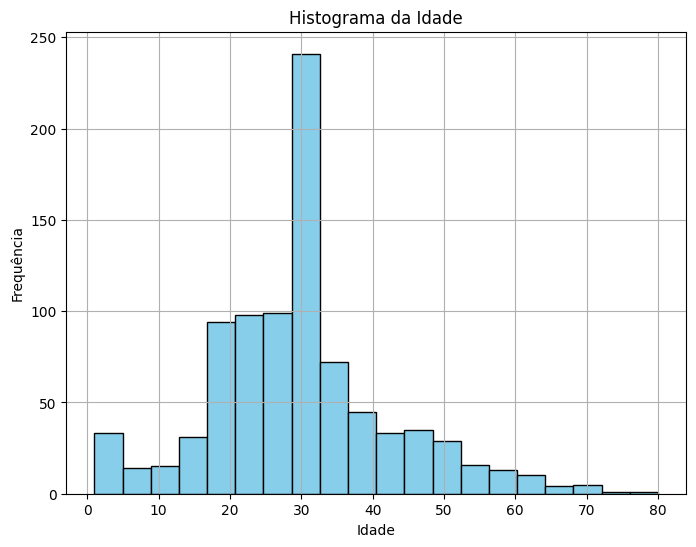

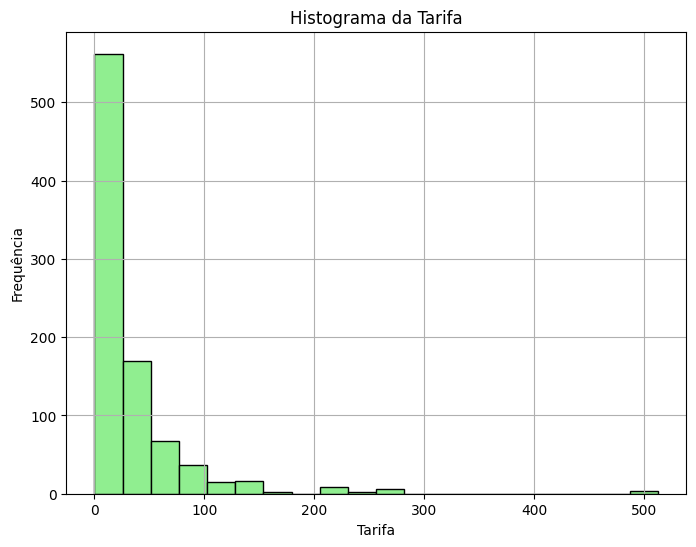

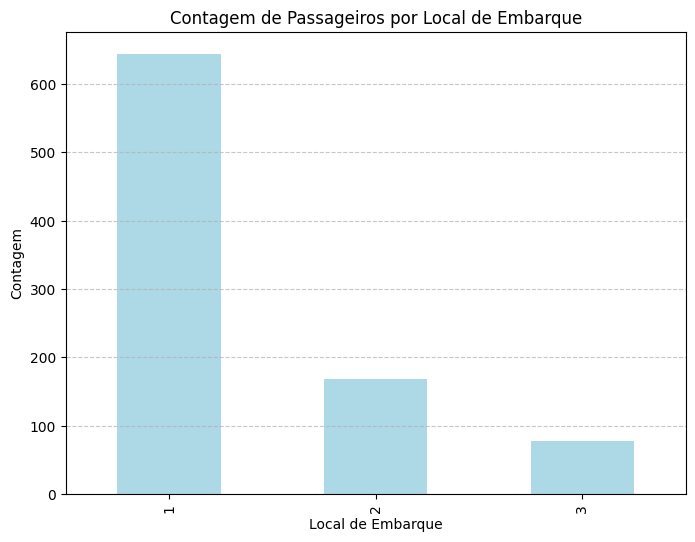

In [ ]:

# Histograma para 'Age'
plt.figure(figsize=(8, 6))
plt.hist(titanic_limpo['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma para 'Fare'
plt.figure(figsize=(8, 6))
plt.hist(titanic_limpo['Fare'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma da Tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Gráfico de barras para 'Embarked'
plt.figure(figsize=(8, 6))
titanic_limpo['Embarked_numerico'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Contagem de Passageiros por Local de Embarque')
plt.xlabel('Local de Embarque')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Tarefa (2) - Utilize alguma tecnica de pre-processamento
from sklearn.preprocessing import StandardScaler

# Inicializar o objeto StandardScaler
scaler = StandardScaler()

# Padronizar os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a mesma transformação aos dados de teste
X_test_scaled = scaler.transform(X_test)

**exemplos de Histogramas pós processamento**

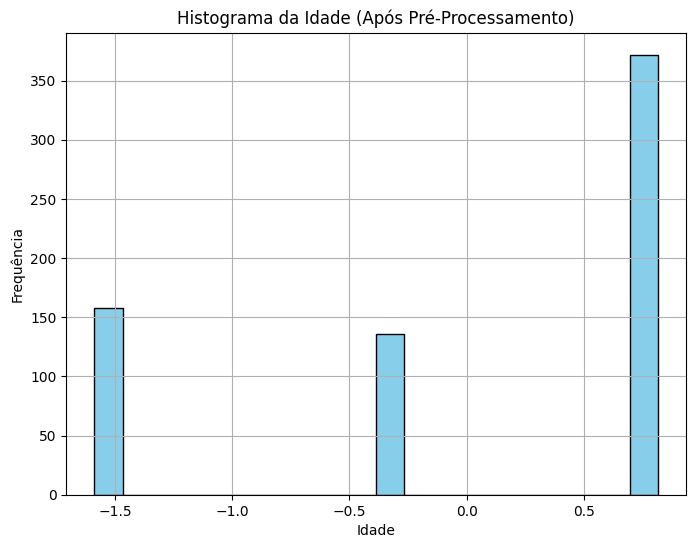

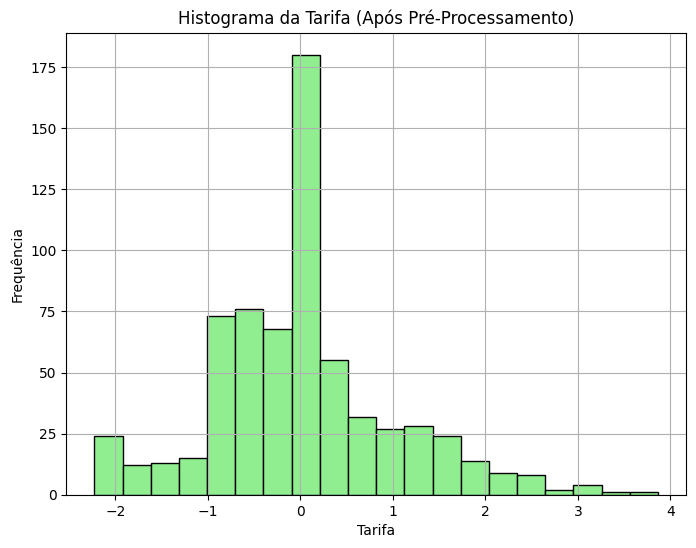

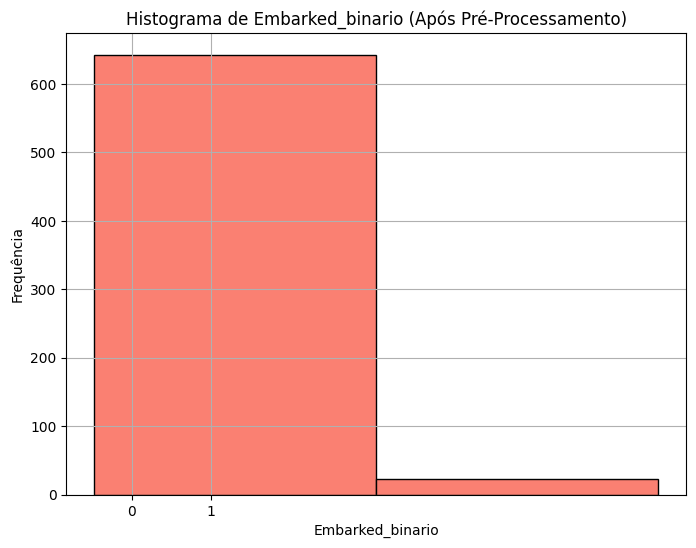

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(X_train_scaled[:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade (Após Pré-Processamento)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma para 'Fare'
plt.figure(figsize=(8, 6))
plt.hist(X_train_scaled[:, 1], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma da Tarifa (Após Pré-Processamento)')
plt.xlabel('Tarifa')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma para 'Embarked_binario'
plt.figure(figsize=(8, 6))
plt.hist(X_train_scaled[:, 2], bins=2, color='salmon', edgecolor='black')
plt.title('Histograma de Embarked_binario (Após Pré-Processamento)')
plt.xlabel('Embarked_binario')
plt.ylabel('Frequência')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

In [ ]:
# Tarefa (3) - Indique os dados finais nas seguintes variaveis:
# X_train -- dados para construcao de um futuro modelo.
# X_test  -- dados para testar um futuro modelo.
# y_train -- label para os dados referentes ao conjunto de treinamento.
# y_test  -- label para os dados referentes ao conjunto de teste.


*Dados Finais:*

*   X_train = X_train_scaled
*   X_test = X_test_scaled
*   y_train & y_test = (não passam por pré-processamento)




#Fazer download do Dataset

In [ ]:
from google.colab import files
titanic_limpo.to_csv('titanic_limpo.csv', index = False)

#fazer download do arquivo em formato csv

files.download('titanic_limpo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>